In [1]:
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score 
from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm
import plotly.express as px

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import StandardScaler
from numpy import mean


In [3]:
df = pd.read_csv('Monkey_Pox_Cases_Worldwide.csv', encoding='latin')
df.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0


In [4]:
df["Confirmed_Cases"] = df["Confirmed_Cases"].astype("int64")
df["Suspected_Cases"] = df["Suspected_Cases"].astype("int64")
df["Hospitalized"] = df["Hospitalized"].astype("int64")
df["Travel_History_Yes"] = df["Travel_History_Yes"].astype("int64")
df["Travel_History_No"] = df["Travel_History_No"].astype("int64")

In [5]:
top_10 = df.sort_values(by="Confirmed_Cases", ascending=False)[:10]
top_10

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
3,United States,24403,0,4,41,11
37,Brazil,7300,0,4,20,4
2,Spain,7083,0,13,2,0
7,France,3934,0,1,2,1
10,Germany,3590,0,18,19,16
0,England,3412,0,5,2,7
36,Peru,2251,0,2,2,0
73,Colombia,1653,0,0,3,0
4,Canada,1388,12,1,5,0
32,Mexico,1367,0,0,3,0


What is the situation of confirmed cases in the countries?

Bar Plot

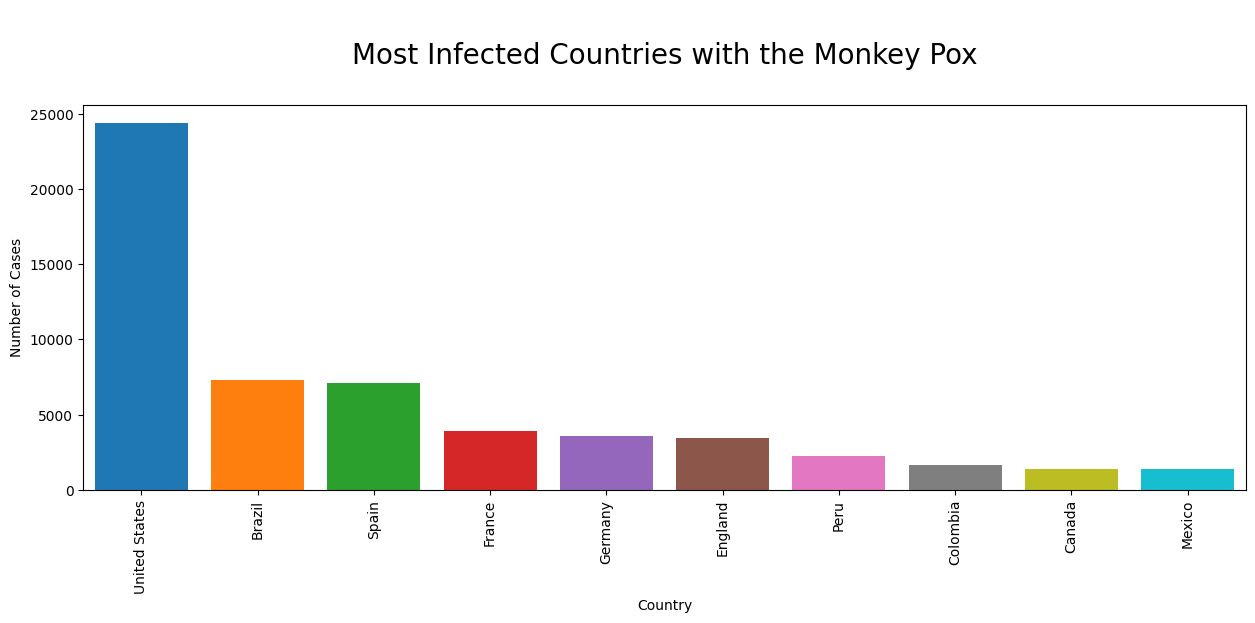

In [6]:
plt.subplots(figsize=(15,5))

p = sns.barplot(x=top_10["Country"],y=top_10["Confirmed_Cases"], saturation=1)
p.axes.set_title("\nMost Infected Countries with the Monkey Pox\n",fontsize=20)
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
plt.show()

Word Map

In [7]:
fig = px.choropleth(data_frame = df,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",height= 600,scope="world",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Confirmed Monkeypox Cases around the world",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

Tree Chart

In [8]:
fig = px.treemap(df, path=["Country"], values='Confirmed_Cases', height=700,
                 color_discrete_sequence = px.colors.qualitative.Set1)
fig.data[0].textinfo = 'label+text+value'
fig.show()

What is the situation of suspected cases in the countries?

In [9]:
top_10 = df.sort_values(by="Suspected_Cases", ascending=False)[:10]
top_10

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
123,Democratic Republic Of The Congo,195,2852,0,0,0
122,Nigeria,277,427,0,0,0
52,Ghana,84,317,1,0,0
126,Cameroon,7,27,0,0,0
4,Canada,1388,12,1,5,0
124,Central African Republic,8,9,0,0,0
57,Uganda,0,6,0,0,0
125,Republic of Congo,3,5,0,0,0
76,Somalia,0,3,3,1,0
28,Iran,1,3,0,0,0


Bar Plot

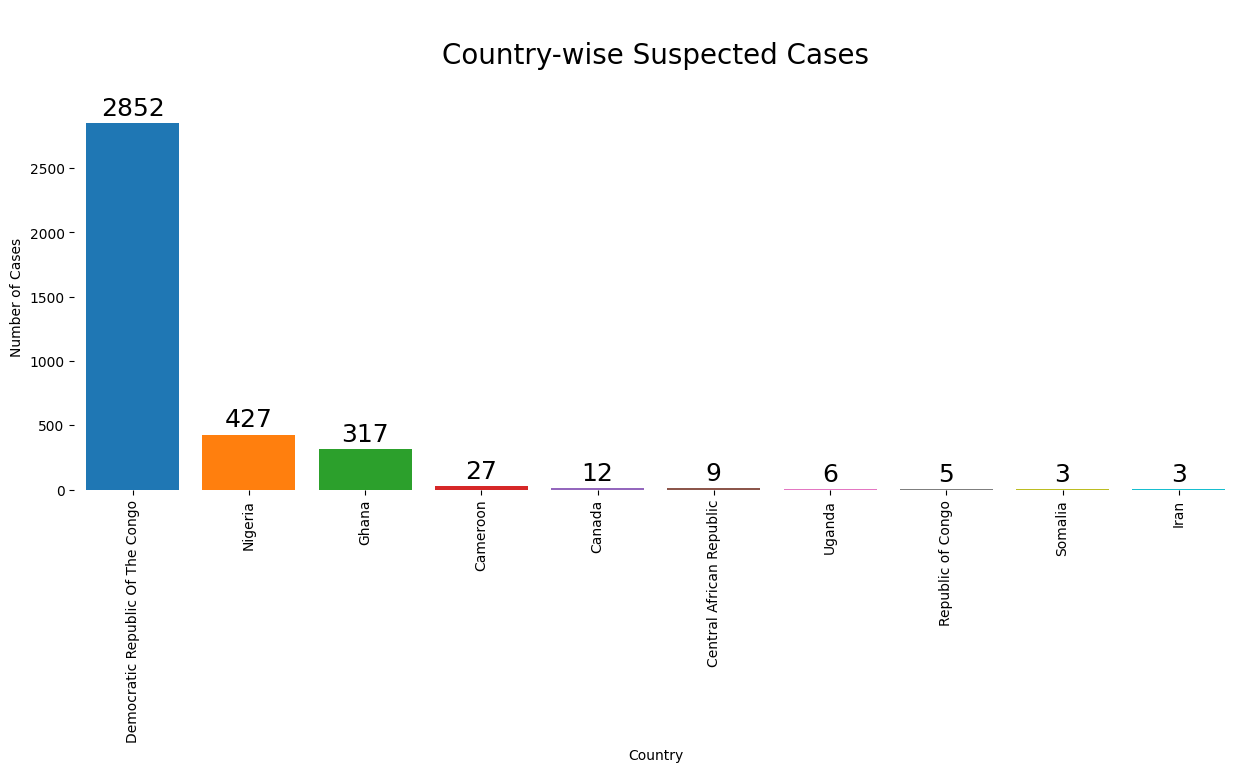

In [10]:
plt.subplots(figsize=(15,5))
p = sns.barplot(x=top_10["Country"],y=top_10["Suspected_Cases"], saturation=1)
p.axes.set_title("\nCountry-wise Suspected Cases\n",fontsize=20)
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=18,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

World Map

In [11]:
fig = px.choropleth(data_frame = df,
                    locations="Country",locationmode="country names", color="Suspected_Cases",height= 600,scope="world",
                    labels={"Suspected_Cases":"Suspected Cases"})

fig.update_layout(title={"text": "Suspected Monkeypox Cases around the world",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

What is the situation of total cases (confirmed + suspected) per country?

In [12]:
df['Total Cases'] = df['Suspected_Cases']+df['Confirmed_Cases']

top_10 = df.sort_values(by="Total Cases", ascending=False)[:10]
top_10

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total Cases
3,United States,24403,0,4,41,11,24403
37,Brazil,7300,0,4,20,4,7300
2,Spain,7083,0,13,2,0,7083
7,France,3934,0,1,2,1,3934
10,Germany,3590,0,18,19,16,3590
0,England,3412,0,5,2,7,3412
123,Democratic Republic Of The Congo,195,2852,0,0,0,3047
36,Peru,2251,0,2,2,0,2251
73,Colombia,1653,0,0,3,0,1653
4,Canada,1388,12,1,5,0,1400


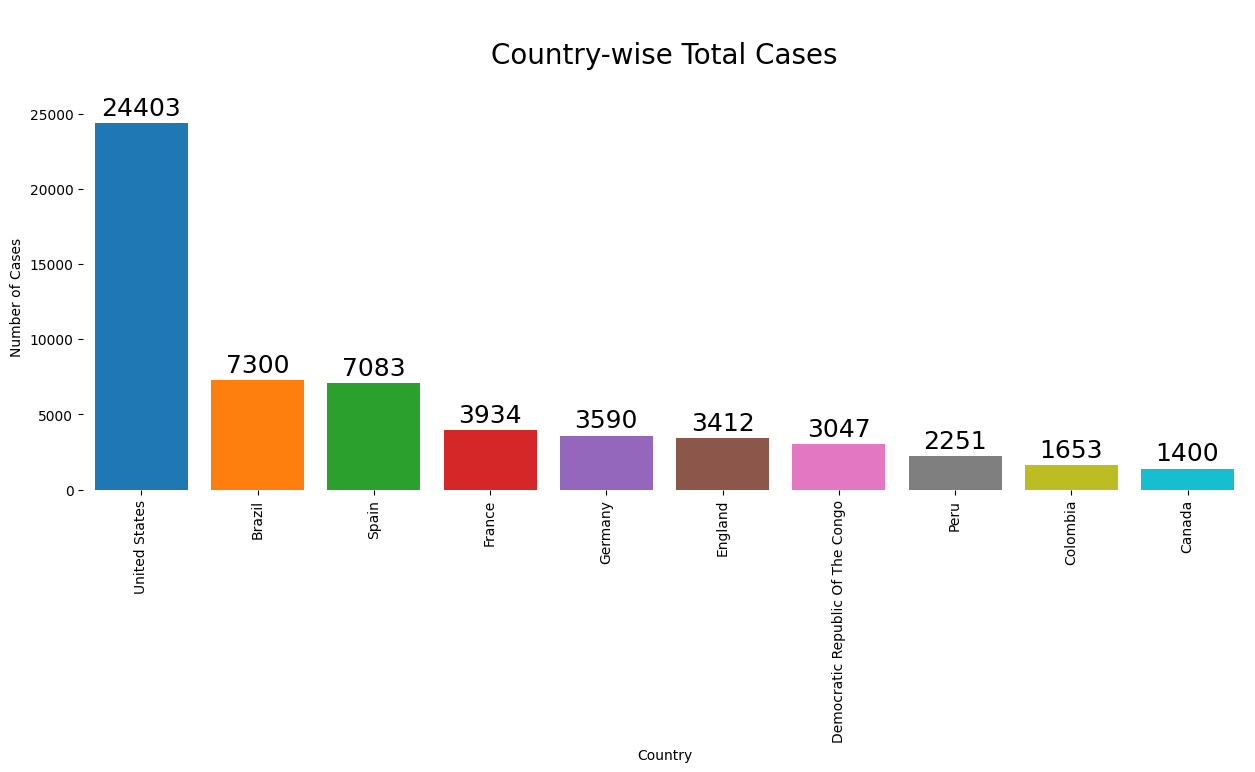

In [13]:
plt.subplots(figsize=(15,5))
p = sns.barplot(x=top_10["Country"],y=top_10["Total Cases"], saturation=1)
p.axes.set_title("\nCountry-wise Total Cases\n",fontsize=20)
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=18,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

In [14]:
fig = px.treemap(top_10, path=["Country"], values='Total Cases', height=700,
                 color_discrete_sequence = px.colors.qualitative.Set2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

What is the situation of hospitalized cases in the countries?

In [15]:
top_10 = df.sort_values(by="Hospitalized", ascending=False)[:10]
top_10

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total Cases
10,Germany,3590,0,18,19,16,3590
6,Italy,837,0,18,19,4,837
2,Spain,7083,0,13,2,0,7083
70,Singapore,19,0,8,4,0,19
61,Romania,39,0,7,0,0,39
0,England,3412,0,5,2,7,3412
27,Bolivia,155,0,5,2,1,155
83,Dominican Republic,31,1,5,1,0,32
3,United States,24403,0,4,41,11,24403
53,India,12,0,4,4,1,12


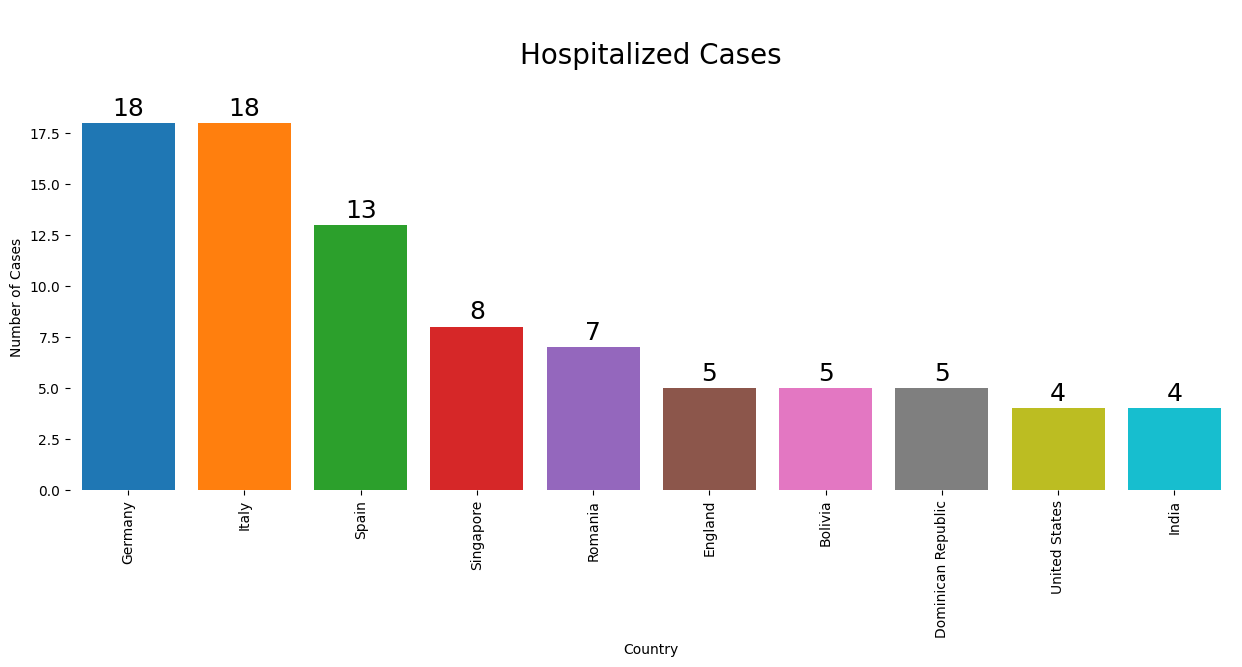

In [16]:
plt.subplots(figsize=(15,5))
p = sns.barplot(x=top_10["Country"],y=top_10["Hospitalized"], saturation=1)
p.axes.set_title("\nHospitalized Cases\n",fontsize=20)
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=18,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

Hospitalization rate in the top countries with the most confirmed cases. 

In [17]:
top_10 = df.sort_values(by="Confirmed_Cases", ascending=False)[:10]
top_10

top_10['Hospitalized_Rate'] = top_10['Hospitalized']/top_10['Confirmed_Cases']

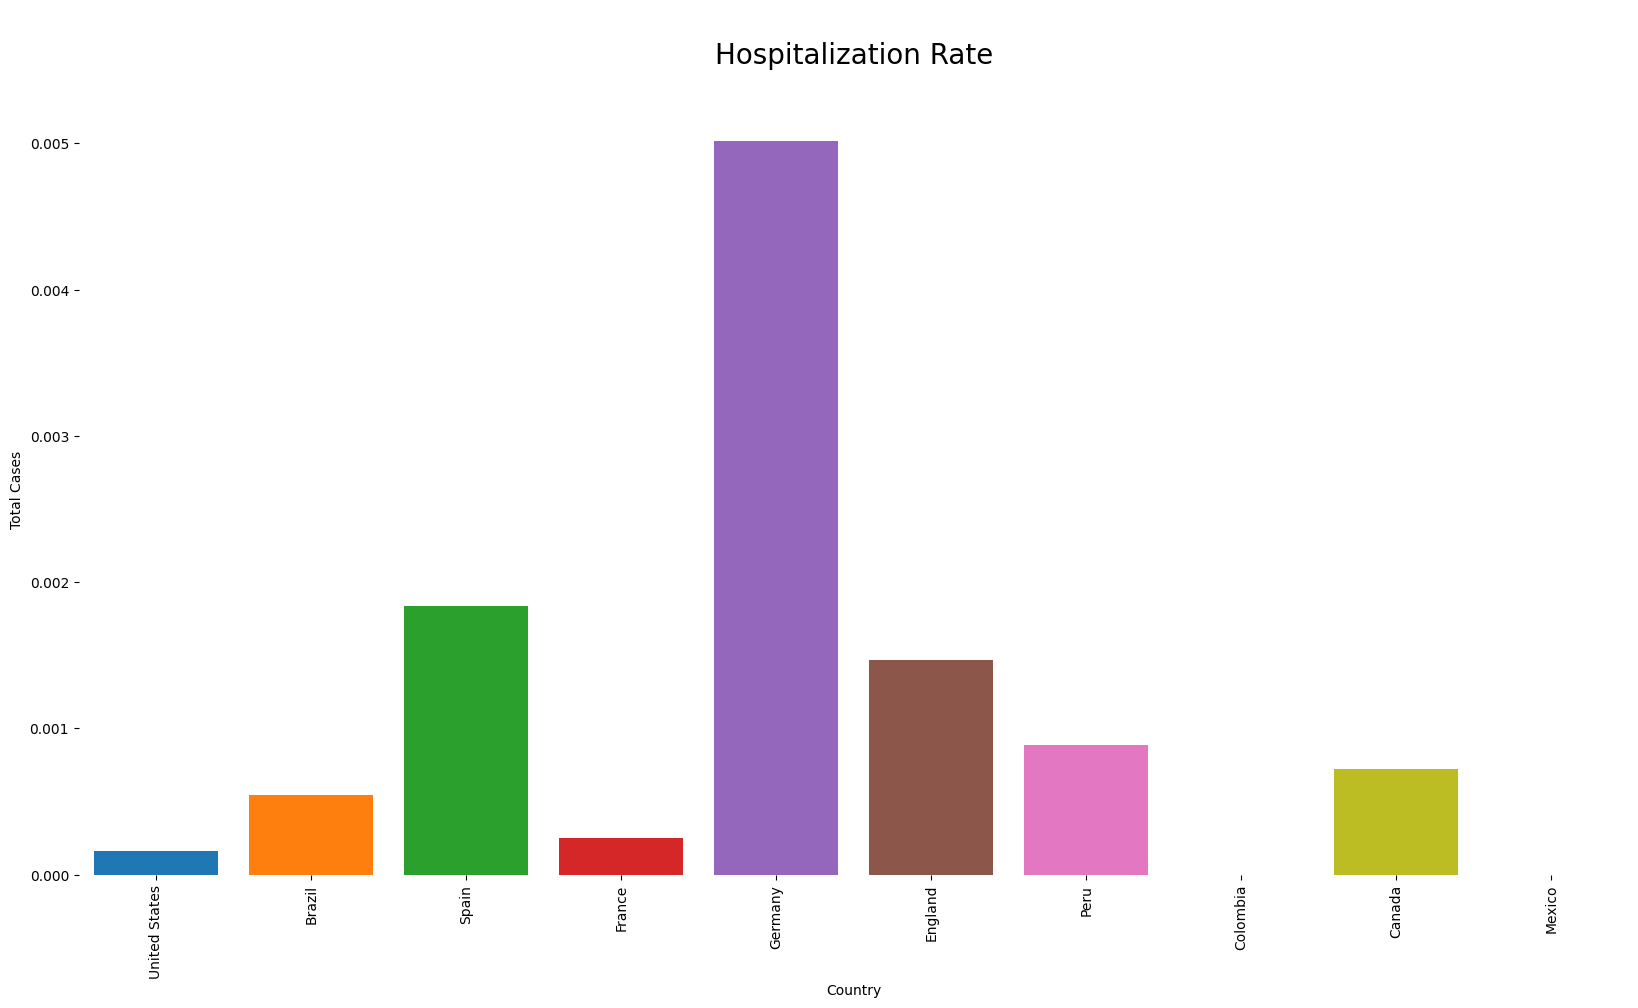

In [18]:
plt.subplots(figsize=(20,10))
p = sns.barplot(x=top_10["Country"],y=top_10["Hospitalized_Rate"], saturation=1)
p.axes.set_title("\nHospitalization Rate\n",fontsize=20)
plt.ylabel("Total Cases")
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
plt.show()

Travel history per country.

In [19]:
confirmed_cases_th = df[df['Confirmed_Cases'] > 100].dropna().sort_values(by="Confirmed_Cases",ascending=False)
fig = px.histogram(confirmed_cases_th, x="Country",y=["Travel_History_Yes","Travel_History_No"])
fig.show()

<ipython-input-20-bcf145a6d8f7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



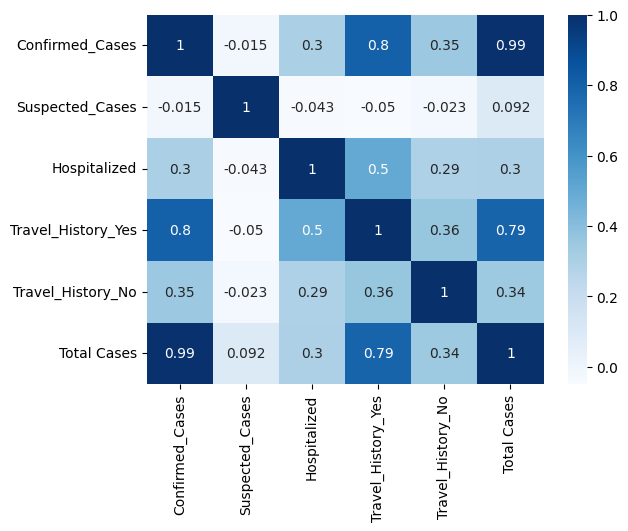

In [20]:
corr = df.corr(method='pearson')

sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [21]:
df2 = pd.read_csv('Worldwide_Case_Detection_Timeline.csv', encoding='latin')
df2.head()

<ipython-input-21-f38d63356d41>:1: DtypeWarning:

Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.



,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [22]:
symptoms=df2['Symptoms'].unique()

In [23]:
df2['Symptoms'] = df2['Symptoms'].fillna('NA')
df2['Symptoms'] = df2['Symptoms'].str.lower()
symptoms_list = []
for symptom in df2['Symptoms'].values:
    if symptom not in symptoms_list:
        symptoms_list.append(symptom)

What are the most common symptoms?

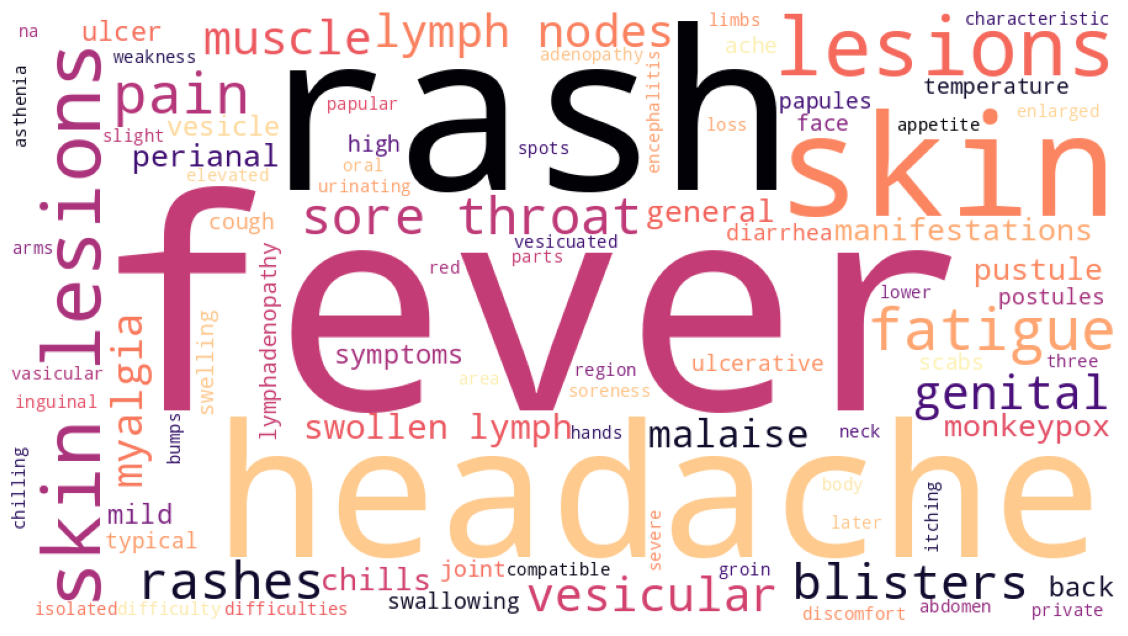

In [24]:
from wordcloud import WordCloud
total_symptoms = " ".join(symptoms_list)
wordcloud = WordCloud(background_color="white", 
                      max_words=300,
                      width=900, 
                      height=500,
                      colormap="magma"                      
                     ).generate(total_symptoms)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

How does the virus affect depending on gender?

In [25]:
df2['Gender'] = df2['Gender'].str.strip()
df2['Gender'] = df2['Gender'].str.lower()
df2['Gender'] = df2['Gender'].replace(np.nan,'NA')

In [26]:
df2.Gender.unique()

array(['NA', 'male', 'female'], dtype=object)

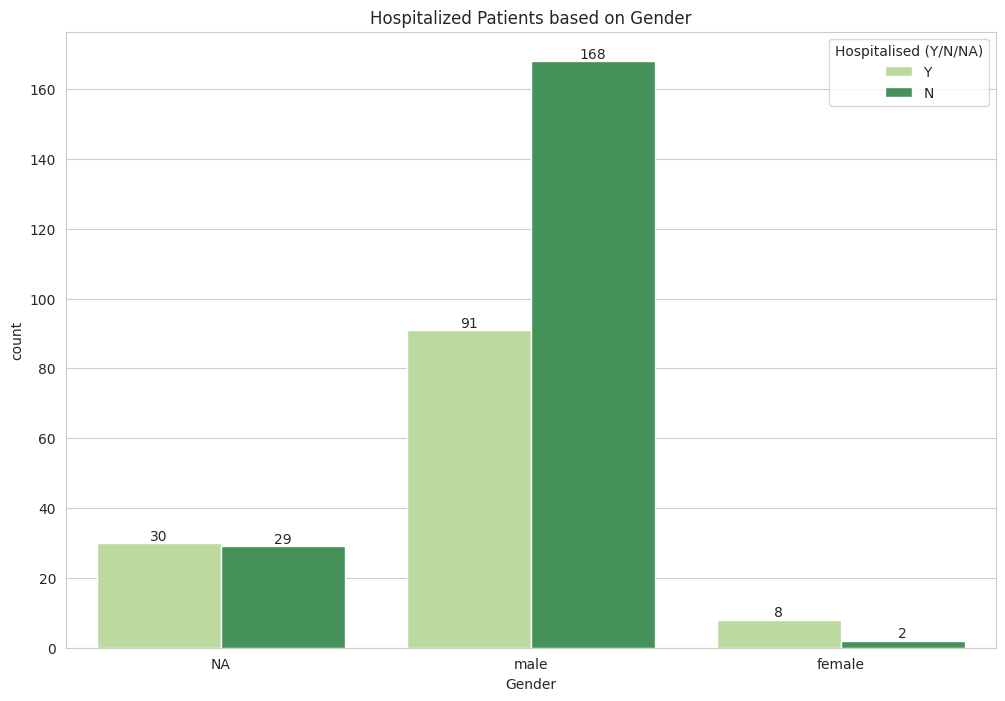

In [27]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Gender',hue='Hospitalised (Y/N/NA)',data=df2, palette = 'YlGn')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Hospitalized Patients based on Gender')
plt.show()

**Travel history according to gender.**

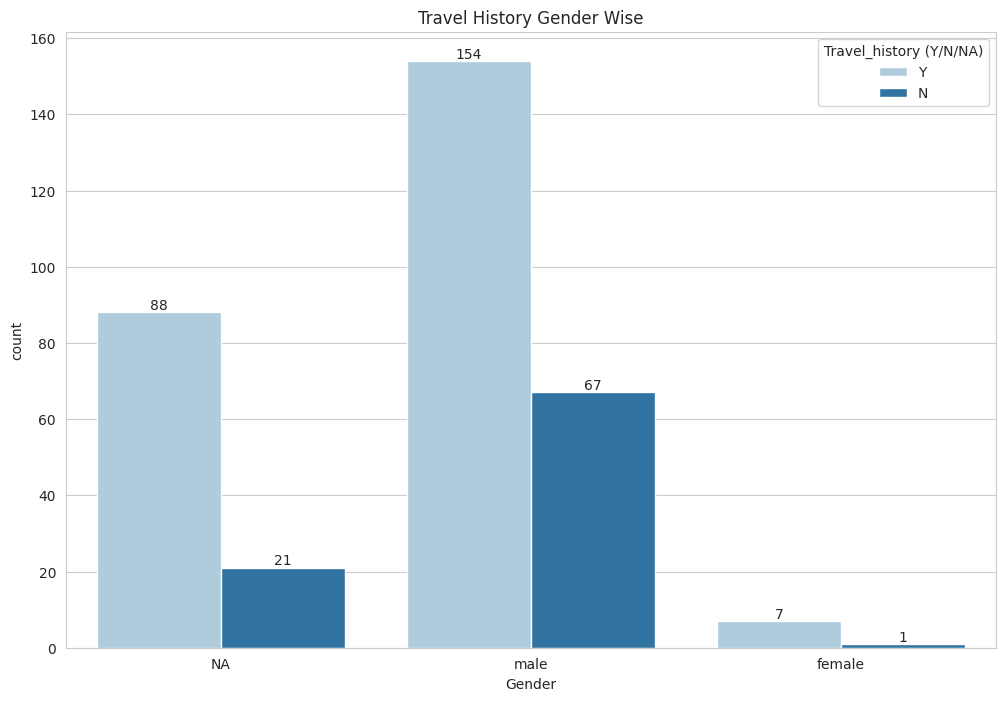

In [28]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Gender',hue='Travel_history (Y/N/NA)',data=df2, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Travel History Gender Wise')
plt.show()

How does the virus affects depending on age?

In [29]:
df2['Age'] = df2['Age'].fillna('0')
df2['Age'] = df2['Age'].apply(lambda x: np.array(x.split('-'), dtype=int).mean())
df2['Age'] = np.ceil(df2['Age']).astype(int)

In [30]:
df2.Age.unique()

array([ 0, 20, 32, 27, 45, 42, 55, 35, 40, 37, 47, 57, 52, 22, 39, 43, 30,
       25, 41, 38, 48, 53, 50, 60, 36, 62,  7, 67, 58, 28, 17, 33, 23,  5,
       18, 15])

In [31]:
df2.Age.value_counts().sort_values(ascending=False)

0     62591
45      884
40      606
42      460
50      190
35      147
32      136
37      104
60       60
39       55
27       54
30       50
43       33
25       23
41       22
22       22
33       19
47       14
36       12
38       12
52        9
20        6
55        5
28        5
57        4
23        4
58        3
17        2
18        2
5         2
62        2
67        2
7         2
48        2
53        1
15        1
Name: Age, dtype: int64

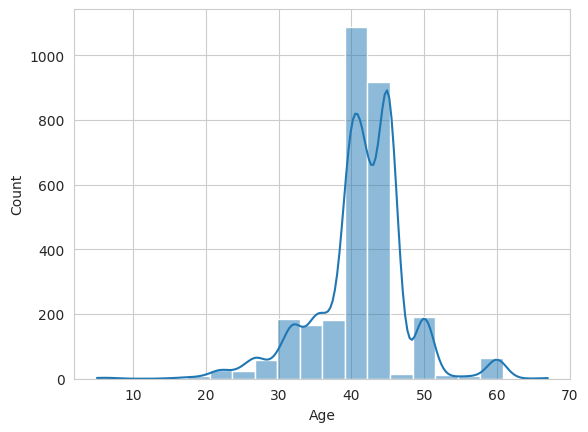

In [32]:
ages_selected = df2[df2['Age']>0]
fig = sns.histplot(ages_selected,x='Age', bins=20, kde='True')
plt.show()


In [33]:
df3 = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv', encoding='latin')
df3.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [34]:
df3.set_index("Country",inplace=True)
df3 = df3.T

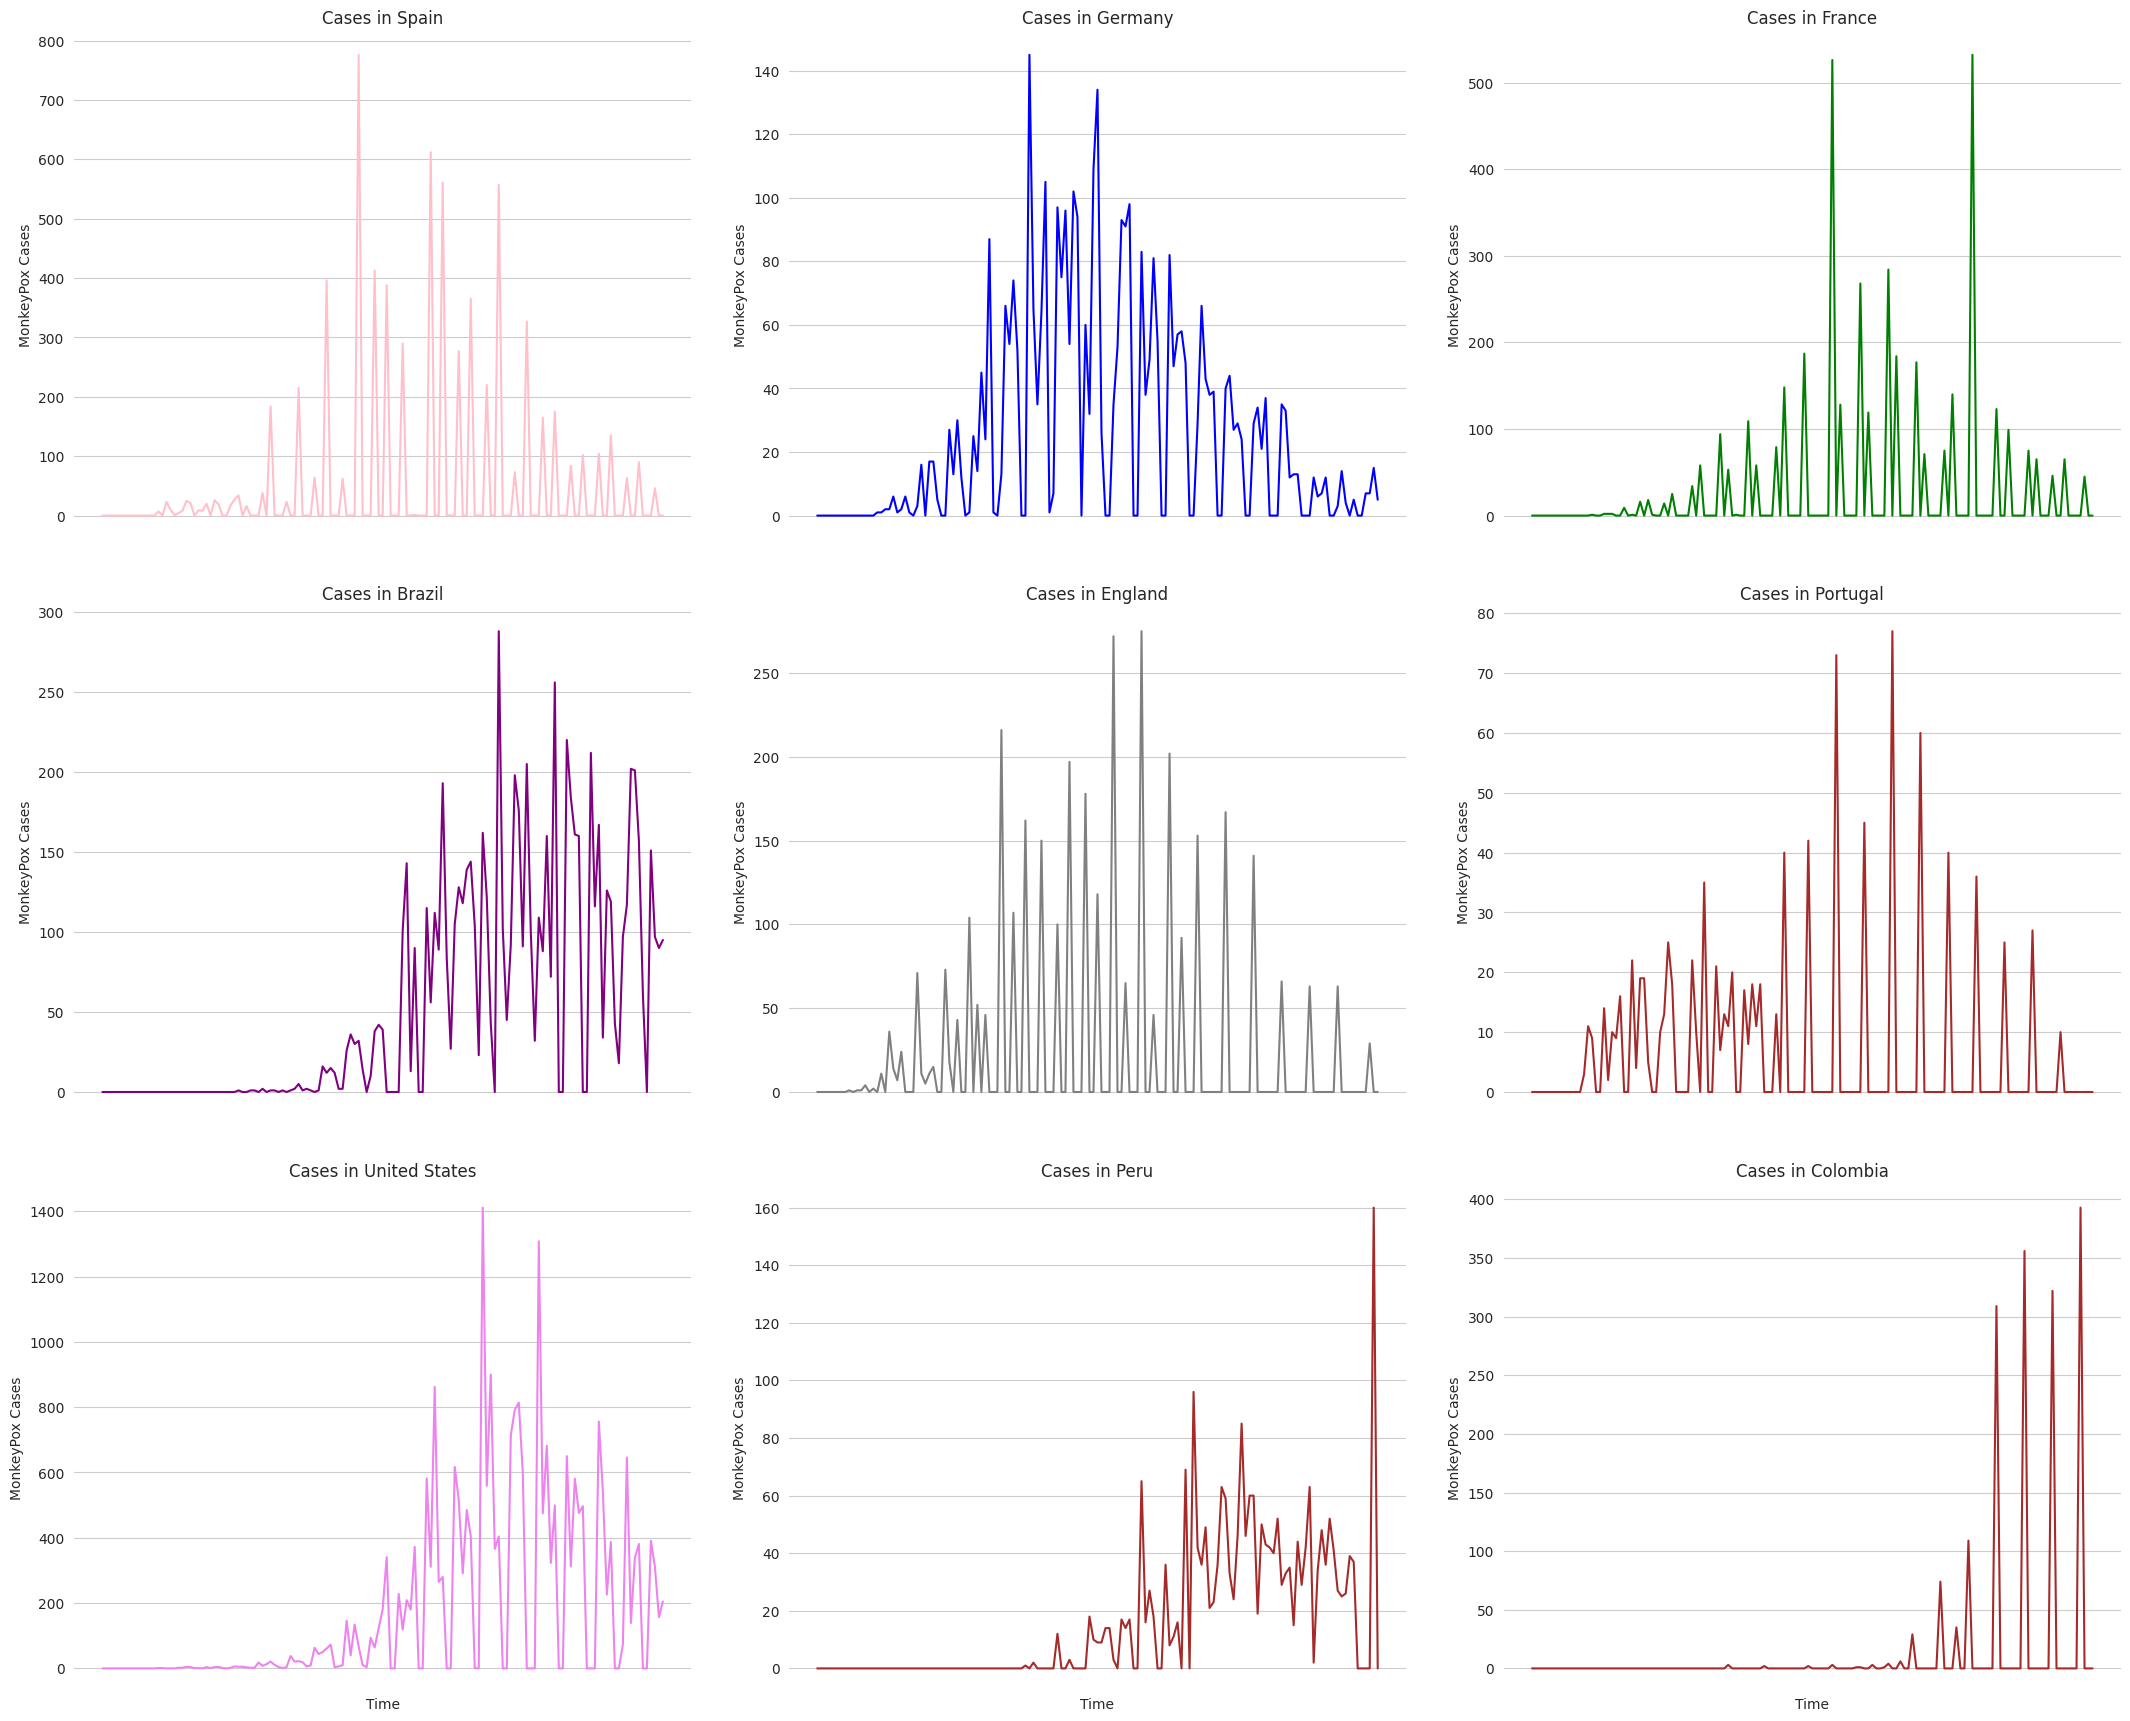

In [35]:
fig, axes = plt.subplots(3,3,figsize=(22,18),sharex=True)
plt.tight_layout(pad=4)
sns.set_style("whitegrid")

sns.lineplot(x=df3.index,y=df3.Spain,ax=axes[0,0],color="pink").set(title="Cases in Spain")
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("MonkeyPox Cases")

sns.lineplot(x=df3.index,y=df3.Germany,ax=axes[0,1],color="blue").set(title="Cases in Germany")
axes[0,1].set_xlabel("Time")
axes[0,1].set_ylabel("MonkeyPox Cases")

sns.lineplot(x=df3.index,y=df3.France,data=df3,ax=axes[0,2],color="green").set(title="Cases in France")
axes[0,2].set_xlabel("Time")
axes[0,2].set_ylabel("MonkeyPox Cases")

sns.lineplot(x=df3.index,y=df3.Brazil,data=df3,ax=axes[1,0],color="purple").set(title="Cases in Brazil")
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("MonkeyPox Cases")

sns.lineplot(x=df3.index,y=df3.England,ax=axes[1,1],color="grey").set(title="Cases in England")
axes[1,1].set_xlabel("Time")
axes[1,1].set_ylabel("MonkeyPox Cases")

sns.lineplot(x=df3.index,y=df3.Portugal,ax=axes[1,2],color="brown").set(title="Cases in Portugal")
axes[1,2].set_xlabel("Time")
axes[1,2].set_ylabel("MonkeyPox Cases")


sns.lineplot(x=df3.index,y="United States",data=df3,ax=axes[2,0],color="violet").set(title="Cases in United States")
axes[2,0].set_xlabel("Time")
axes[2,0].set_ylabel("MonkeyPox Cases")



sns.lineplot(x=df3.index,y=df3.Peru,ax=axes[2,1],color="brown").set(title="Cases in Peru")
axes[2,1].set_xlabel("Time")
axes[2,1].set_ylabel("MonkeyPox Cases")


sns.lineplot(x=df3.index,y=df3.Colombia,ax=axes[2,2],color="brown").set(title="Cases in Colombia")
axes[2,2].set_xlabel("Time")
axes[2,2].set_ylabel("MonkeyPox Cases")
axes[2,2].set_xticks([],minor=False)
sns.despine(left=True,bottom=True,right=True,top=True)
plt.show()

In [36]:
data_frame_calculated = pd.read_csv('data_frame_calculated1.csv', encoding='latin')
data_frame_calculated.head()

,date_confirm,travel_yes,travel_no,total_cases
0,2022-01-31,0,3,3
1,2022-02-17,0,3,3
2,2022-02-28,0,1,1
3,2022-03-04,0,2,2
4,2022-03-31,0,6,6


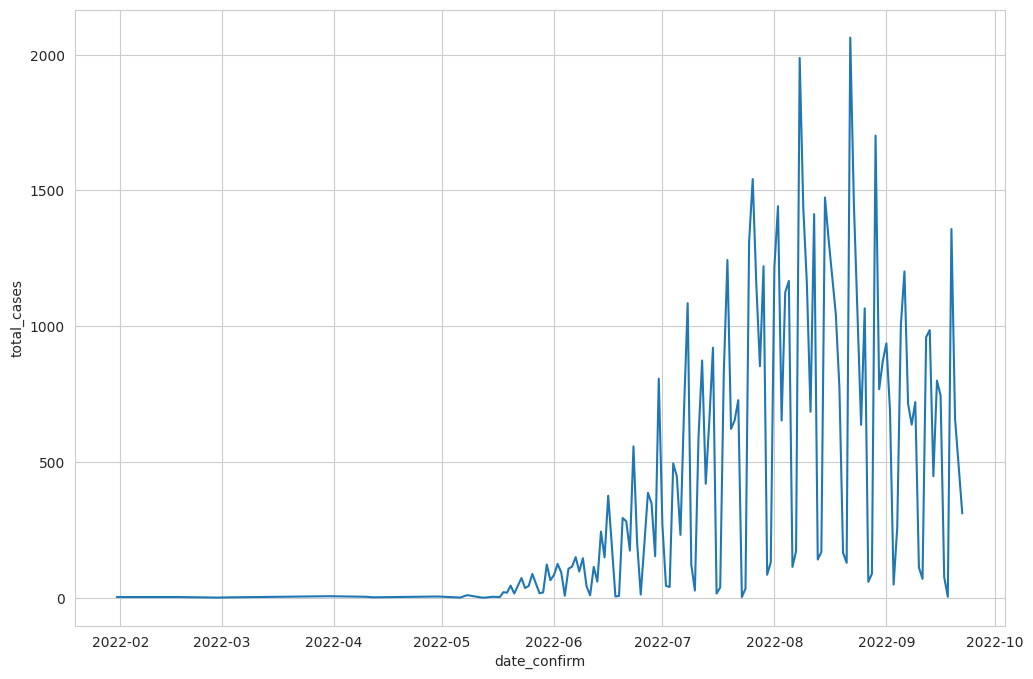

In [51]:
ig,axes = plt.subplots(figsize=(12,8))
sns.lineplot(x='date_confirm', y='total_cases', data = data_frame_calculated)
plt.show()

In [37]:
def split_data_for_multivariate(new_data):

    data_frame_calculated['date_confirm'] = pd.to_datetime(data_frame_calculated['date_confirm'])
    data_frame_calculated.sort_values(by='date_confirm', inplace=True)
    train_df = data_frame_calculated.iloc[0:113, 1:]
    test_df = data_frame_calculated.iloc[113:, 1:]
    test_df.reset_index(inplace=True)
    test_df = test_df[['travel_yes', 'travel_no', 'total_cases']]

    return train_df, test_df

In [38]:
def scaler_for_multivariate(train_df, test_df):
    scaler = StandardScaler()
    scaler2 = StandardScaler()

    scaled_subtrain_df = scaler.fit_transform(train_df)
    scaled_subtest_df = scaler.fit_transform(test_df)

    scaled_train_label = scaler2.fit_transform(train_df[['total_cases']])
    scaled_subtest_label = scaler2.fit_transform(test_df[['total_cases']])
    return scaler2, scaler, scaled_subtrain_df, scaled_subtest_df, scaled_subtest_label, scaled_train_label
    


In [39]:
def create_arrays_for_model(scaled_subtrain_df, time_steps, instances_train):

    x_train = []
    y_train = []

    for i in range(time_steps, instances_train):
        x_train.append(scaled_subtrain_df[i - 14:i])
        y_train.append(scaled_subtrain_df[i][0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Pregatim setul de train pentru input-ul retelei
    x_train_reshape = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

    return x_train, y_train, x_train_reshape

In [45]:
def bilstm(x_train, y_train, time_steps, features):
    model = Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500,return_sequences=True,input_shape = (time_steps,features), activation='relu')))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500)))
    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss = 'mean_squared_error')
    model.fit(x_train, y_train, epochs= 100, batch_size=32)
    print(model.summary())
    return model

In [46]:
def calculate_results(fully_final, test_df, y_final_pred):
    print("Predictiile: \n", fully_final)

    print("MAE {:.2f} ".format(mean(tf.keras.metrics.mean_absolute_error(np.array(list(test_df["total_cases"].values)),
                                                                         np.array(list(y_final_pred))))))
    print("MSE {:.2f} ".format(mean(tf.keras.metrics.mean_squared_error(np.array(list(test_df["total_cases"].values)),
                                                                        np.array(list(y_final_pred))))))
    plt.plot(fully_final['total_cases'], label='actual', color='red')
    plt.plot(fully_final['total_cases_final_pred'], label='predicted', color='blue')
    plt.legend()
    plt.show()


def prepare_final_df_for_multivariate(train_df, test_df, scaler, model, scaler2):
    train_last14 = train_df.iloc[-14:]
    print("train_last_14: ", train_last14)
    print("type train_last_14: ", type(train_last14))
    df2_test = test_df[['travel_yes', 'travel_no', 'total_cases']]
    full_df = pd.concat((train_last14, df2_test), axis=0)
    print(full_df.shape)
    full_df.head()

    full_df = scaler.transform(full_df)
    print(full_df.shape)

    print("full_df: ", full_df)
    print("type full_df: ", type(full_df))

    hops = 14
    no_records = 42
    no_cols = 3
    x_train_pred = []

    for i in range(14, 42):
        x_train_pred.append(full_df[i - 14:i])

    x_train_pred = np.array(x_train_pred)
    print(x_train_pred.shape)

    print("x_train_pred: \n", x_train_pred)
    print("type x_train_pred: \n", type(x_train_pred))

    ytest = model.predict(x_train_pred)
    y_final_pred = scaler2.inverse_transform(ytest)
    print(y_final_pred)

    print("mae {:.2f} ".format(mean(tf.keras.metrics.mean_absolute_error(np.array(list(test_df["total_cases"].values)),
                                                                         np.array(list(y_final_pred))))))
    print("mse {} ".format(mean(tf.keras.metrics.mean_squared_error(np.array(list(test_df["total_cases"].values)),
                                                                    np.array(list(y_final_pred))))))

    final_pred = pd.DataFrame(y_final_pred)
    final_pred.columns = ['total_cases_final_pred']

    fully_final = pd.concat((final_pred, test_df), axis=1)
    fully_final = fully_final[['total_cases', 'total_cases_final_pred', 'travel_yes', 'travel_no']]
    print(fully_final)

    return fully_final, y_final_pred

In [47]:
train_df, test_df = split_data_for_multivariate(data_frame_calculated)

In [48]:
scaler2, scaler, scaled_subtrain_df, scaled_subtest_df, scaled_subtest_label, scaled_train_label= scaler_for_multivariate(train_df, test_df)

Epoch 1/100
4/4 [==============================] - 15s 1s/step - loss: 1.1191
Epoch 2/100
4/4 [==============================] - 4s 875ms/step - loss: 1.2470
Epoch 3/100
4/4 [==============================] - 4s 876ms/step - loss: 1.0500
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 1.0498
Epoch 5/100
4/4 [==============================] - 3s 859ms/step - loss: 0.9727
Epoch 6/100
4/4 [==============================] - 3s 841ms/step - loss: 0.9645
Epoch 7/100
4/4 [==============================] - 4s 928ms/step - loss: 1.0334
Epoch 8/100
4/4 [==============================] - 4s 901ms/step - loss: 0.9574
Epoch 9/100
4/4 [==============================] - 4s 839ms/step - loss: 1.0288
Epoch 10/100
4/4 [==============================] - 4s 847ms/step - loss: 0.9547
Epoch 11/100
4/4 [==============================] - 4s 1s/step - loss: 1.1023
Epoch 12/100
4/4 [==============================] - 4s 871ms/step - loss: 0.9243
Epoch 13/100
4/4 [===========================

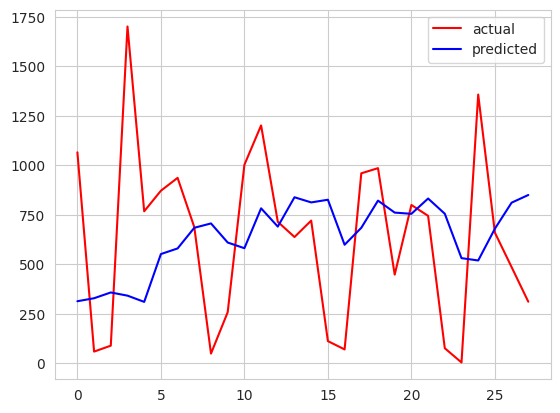

In [49]:
time_steps = 14
instances_train = 113
features = 3

x_train, y_train, x_train_reshape = create_arrays_for_model(scaled_subtrain_df, time_steps, instances_train)

model = bilstm(x_train, y_train, time_steps, features)

fully_final, y_final_pred = prepare_final_df_for_multivariate(train_df, test_df, scaler, model, scaler2)

calculate_results(fully_final, test_df, y_final_pred)